In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("LOAN.csv")
df=df.dropna(axis=0)
df

def gender(x):
    if x == 'Male':
        return 1
    else:
        return 0
df['Gender']=df['Gender'].apply(gender)
df

def binary(x):
    if x == 'Yes':
        return 1
    else:
        return 0
df['Married']=df['Married'].apply(binary)
df

def depen(x):
    if x == '3+':
        return 3
    else:
        return int(x)

df['Dependents']=df['Dependents'].apply(depen)

df['Self_Employed']=df['Self_Employed'].apply(binary)
df

def grad(x):
    if x == 'Graduate':
        return 1
    else:
        return 0
df['Education']=df['Education'].apply(grad)
df

def Land(x):
    if x == 'Rural':
        return 1
    elif x == 'Semiurban':
        return 2
    else:
        return 3
df['Property_Area']=df['Property_Area'].apply(Land)
df

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [16]:
X = np.array(df.iloc[:,1:12])
Y = np.array(df.iloc[:,12])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [17]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test) 

In [36]:
X_train

array([[-2.25869319, -1.38810276, -0.79498957, ...,  0.27466257,
        -2.38047614,  1.23519622],
       [ 0.44273388, -1.38810276, -0.79498957, ...,  2.02472496,
        -2.38047614,  1.23519622],
       [ 0.44273388,  0.72040776,  0.17846705, ...,  0.27466257,
         0.42008403, -0.06121964],
       ...,
       [ 0.44273388, -1.38810276, -0.79498957, ...,  2.02472496,
         0.42008403,  1.23519622],
       [ 0.44273388,  0.72040776, -0.79498957, ...,  0.27466257,
         0.42008403, -1.35763549],
       [ 0.44273388,  0.72040776, -0.79498957, ...,  0.27466257,
         0.42008403, -1.35763549]])

In [18]:
def man(a,b):
    l = len(a)
    dt = 0
    for i in range(l):
        dt+=np.absolute(a[i]-b[i])
    return dt

In [19]:
from scipy import stats as st

In [20]:
def KNN(P,X,Y,KVAL):
    neighbors = []
    for i,j in zip(X,Y):
        neighbors.append([i,j])
    for k in neighbors:
        dist = man(P,k[0])
        k.append(dist)
    neighb = sorted(neighbors,key = lambda x : x[2])
    results = []
    for i in neighb:
        results.append(i[1])
        if len(results)>KVAL-1:
            break
    results = np.array(results)
    res = st.mode(results)
    lis = np.array(res[0])
    return list(lis)[0]
    

In [21]:
def KNNFULL(P,X,Y,K):
    Y_pred = []
    for i in P:
        Y_pred.append(KNN(i,X,Y,K))
    return Y_pred
        
        

In [22]:
Y_pred = KNNFULL(X_test,X_train,Y_train,10)

C:\Users\dllab.DLL-040\AppData\Local\Temp\ipykernel_3888\1013956616.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  res = st.mode(results)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\dllab.DLL-040\AppData\Local\Temp\ipykernel_3888\1013956616.py:15: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://

In [23]:
Y_pred

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y']

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
def acc(a,b):
    crt=0
    tot = len(a)
    for i,j in zip(a,b):
        if i==j:
            crt=+1
    return crt/tot*100

In [43]:
def evaluate(Y_test,Y_pred):
    print('CLASSIFICATION REPORT:\n',classification_report(Y_test,Y_pred))

    print('ACCURACY:\n',acc(Y_test,Y_pred)*100)

    cm=confusion_matrix(Y_test,Y_pred)
    sns.heatmap(cm,annot=True,fmt='g',xticklabels=['YES','NO'],yticklabels=['YES','NO'])
    plt.ylabel("PREDICTION")
    plt.xlabel("ACTUAL")
    plt.title("CONFUSION MATRIX")
    plt.show()

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           N       0.81      0.42      0.55        31
           Y       0.83      0.97      0.89        89

    accuracy                           0.82       120
   macro avg       0.82      0.69      0.72       120
weighted avg       0.82      0.82      0.80       120

ACCURACY:
 83.33333333333334


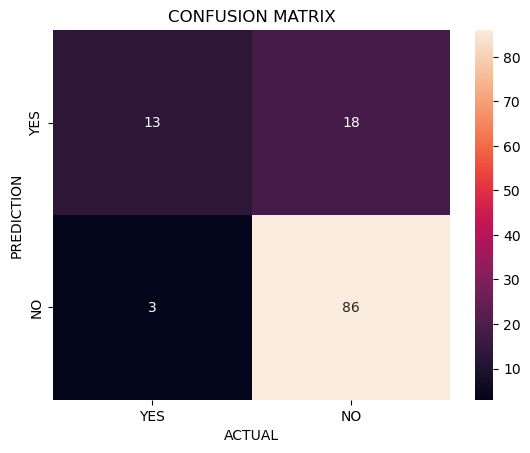

In [44]:
evaluate(Y_test,Y_pred)

In [45]:
accuracy = []
for i in range(1,21):
    y_pred = KNNFULL(X_test,X_train,Y_train,i)
    a = accuracy_score(Y_test,y_pred)*100
    accuracy.append(a)
    

C:\Users\dllab.DLL-040\AppData\Local\Temp\ipykernel_3888\1013956616.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  res = st.mode(results)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\dllab.DLL-040\AppData\Local\Temp\ipykernel_3888\1013956616.py:15: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://

C:\Users\dllab.DLL-040\AppData\Local\Temp\ipykernel_3888\1013956616.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  res = st.mode(results)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\dllab.DLL-040\AppData\Local\Temp\ipykernel_3888\1013956616.py:15: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://

C:\Users\dllab.DLL-040\AppData\Local\Temp\ipykernel_3888\1013956616.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  res = st.mode(results)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\dllab.DLL-040\AppData\Local\Temp\ipykernel_3888\1013956616.py:15: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://

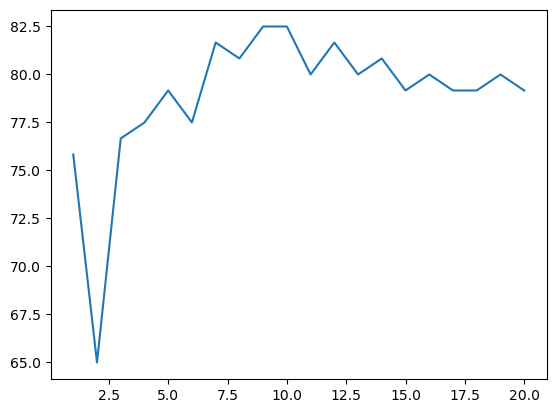

In [46]:
plt.plot(range(1,21),accuracy)